In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sub = pd.read_csv('data/sample_submit.csv')

<img src='output/pairplot_train.png'>Image description</img>

In [4]:
train_x = train.drop(['blueWins'], axis=1).copy()
train_y = train['blueWins'].copy()

test_x = test.copy()

In [5]:
train_x = train_x.drop(['gameId'], axis=1)
test_x = test_x.drop(['gameId'], axis=1)

In [6]:
train_x

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience
0,0,5,8,6,0,0,14536,17256
1,1,10,1,5,0,0,14536,17863
2,0,3,10,2,0,0,17409,17256
3,1,7,10,8,0,0,19558,18201
4,0,4,9,4,0,0,17409,17256
...,...,...,...,...,...,...,...,...
7995,1,9,6,14,0,0,18513,18201
7996,0,3,10,4,0,0,17381,19797
7997,1,9,3,9,2,1,18274,18491
7998,0,5,10,6,1,1,18274,18491


# 変数の組み合わせ
- カテゴリ変数の各水準における、他の変数の平均、分散など
- カテゴリ変数の頻度
- blueTotalExperience / (blueKills * w1 + blueAssists * w2)
- blueTotalGold / (blueKills * w1 + blueAssists * w2)
- [blueKills - blueDeaths]

In [6]:
cat_cols = ['blueFirstBlood','blueEliteMonsters','blueDragons']
num_cols = ['blueKills', 'blueDeaths','blueAssists','blueTotalGold','blueTotalExperience']

In [7]:
pd.options.display.max_columns = 100

## 三つのカテゴリ変数についてユニークなレコードの、数値変数の統計量

In [1]:
# 三つのカテゴリ変数についてユニークなレコードの、数値変数の統計量
ref = train_x.groupby(cat_cols)[num_cols].agg(['mean','max','min','var']).reset_index()
# ref.columns = ['variable','aggfunc', 'result']
ref = ref.melt(id_vars=cat_cols)
ref = ref.rename(columns={'variable_0':'variable', 'variable_1':'func'})

for i,v in ref.iterrows():
  c = "3cat_" + v['variable'] + "_" + v['func']
  idx = train_x.loc[(train_x['blueFirstBlood'] == v['blueFirstBlood']) &
              (train_x['blueEliteMonsters'] == v['blueEliteMonsters']) &
              (train_x['blueDragons'] == v['blueDragons'])].index
  train_x.loc[idx, c] = v['value']

NameError: name 'train_x' is not defined

In [9]:
# 三つのカテゴリ変数についてユニークなレコードの、数値変数の統計量
ref = test_x.groupby(cat_cols)[num_cols].agg(['mean','max','min','var']).reset_index()
# ref.columns = ['variable','aggfunc', 'result']
ref = ref.melt(id_vars=cat_cols)
ref = ref.rename(columns={'variable_0':'variable', 'variable_1':'func'})

for i,v in ref.iterrows():
  c = "3cat_" + v['variable'] + "_" + v['func']
  idx = test_x.loc[(test_x['blueFirstBlood'] == v['blueFirstBlood']) &
              (test_x['blueEliteMonsters'] == v['blueEliteMonsters']) &
              (test_x['blueDragons'] == v['blueDragons'])].index
  test_x.loc[idx, c] = v['value']

In [10]:
train_x = train_x[test_x.columns]

In [11]:
# 数値変数の欠損値を学習データの平均で埋める
for col in train_x.columns:
    train_x[col].fillna(train_x[col].mean(), inplace=True)
    test_x[col].fillna(test_x[col].mean(), inplace=True)

In [12]:
train_x.isnull().sum()

blueFirstBlood                   0
blueKills                        0
blueDeaths                       0
blueAssists                      0
blueEliteMonsters                0
blueDragons                      0
blueTotalGold                    0
blueTotalExperience              0
3cat_blueKills_mean              0
3cat_blueKills_max               0
3cat_blueKills_min               0
3cat_blueKills_var               0
3cat_blueDeaths_mean             0
3cat_blueDeaths_max              0
3cat_blueDeaths_min              0
3cat_blueDeaths_var              0
3cat_blueAssists_mean            0
3cat_blueAssists_max             0
3cat_blueAssists_min             0
3cat_blueAssists_var             0
3cat_blueTotalGold_mean          0
3cat_blueTotalGold_max           0
3cat_blueTotalGold_min           0
3cat_blueTotalGold_var           0
3cat_blueTotalExperience_mean    0
3cat_blueTotalExperience_max     0
3cat_blueTotalExperience_min     0
3cat_blueTotalExperience_var     0
dtype: int64

In [13]:
test_x.isnull().sum()

blueFirstBlood                   0
blueKills                        0
blueDeaths                       0
blueAssists                      0
blueEliteMonsters                0
blueDragons                      0
blueTotalGold                    0
blueTotalExperience              0
3cat_blueKills_mean              0
3cat_blueKills_max               0
3cat_blueKills_min               0
3cat_blueKills_var               0
3cat_blueDeaths_mean             0
3cat_blueDeaths_max              0
3cat_blueDeaths_min              0
3cat_blueDeaths_var              0
3cat_blueAssists_mean            0
3cat_blueAssists_max             0
3cat_blueAssists_min             0
3cat_blueAssists_var             0
3cat_blueTotalGold_mean          0
3cat_blueTotalGold_max           0
3cat_blueTotalGold_min           0
3cat_blueTotalGold_var           0
3cat_blueTotalExperience_mean    0
3cat_blueTotalExperience_max     0
3cat_blueTotalExperience_min     0
3cat_blueTotalExperience_var     0
dtype: int64

In [14]:
# # 各カテゴリ変数の各水準における、数値変数の統計量
# for col in cat_cols:
#   ref = train_x.groupby(col)[num_cols].agg(['mean','max','min','var']).reset_index()
#   # ref.columns = ['variable','aggfunc', 'result']
#   ref = ref.melt(id_vars=col)
#   ref = ref.rename(columns={'variable_0':'variable', 'variable_1':'func'})

#   for i,v in ref.iterrows():
#     c = col + "_" + str(v[col]) + "_" + v['variable'] + "_" + v['func']
#     train_x.loc[train_x[col] == v[col], c] = v['value']

In [15]:
train_x.corr()

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,3cat_blueKills_mean,3cat_blueKills_max,3cat_blueKills_min,3cat_blueKills_var,3cat_blueDeaths_mean,3cat_blueDeaths_max,3cat_blueDeaths_min,3cat_blueDeaths_var,3cat_blueAssists_mean,3cat_blueAssists_max,3cat_blueAssists_min,3cat_blueAssists_var,3cat_blueTotalGold_mean,3cat_blueTotalGold_max,3cat_blueTotalGold_min,3cat_blueTotalGold_var,3cat_blueTotalExperience_mean,3cat_blueTotalExperience_max,3cat_blueTotalExperience_min,3cat_blueTotalExperience_var
blueFirstBlood,1.000000,0.283559,-0.325833,0.241781,0.213862,0.155051,-0.111157,0.033651,0.818176,0.920348,0.120735,0.891167,-0.893268,0.005036,-0.120436,-0.697380,0.803288,0.525442,0.000095,0.078594,-0.456002,-0.224729,-0.028282,0.767734,0.100442,0.065142,0.598189,-0.841252
blueKills,0.283559,1.000000,-0.079929,0.710046,0.246184,0.196728,0.099387,0.309264,0.346575,0.303358,0.126808,0.277192,-0.340386,-0.010613,0.024105,-0.245816,0.344569,0.026031,0.013192,0.032788,0.016274,-0.129431,0.007169,0.239199,0.216436,-0.076638,0.278943,-0.337017
blueDeaths,-0.325833,-0.079929,1.000000,-0.060368,-0.223138,-0.180798,0.060901,-0.051879,-0.358252,-0.337877,-0.112667,-0.317819,0.364766,0.000443,0.018210,0.276508,-0.354941,-0.069306,-0.000128,-0.034090,0.024698,0.134614,0.001749,-0.273551,-0.184820,0.059968,-0.287375,0.355207
blueAssists,0.241781,0.710046,-0.060368,1.000000,0.213466,0.176668,0.108863,0.301567,0.299246,0.253271,0.097319,0.238959,-0.292881,-0.017922,0.026936,-0.212289,0.300989,0.008777,0.020127,0.045173,0.025485,-0.097197,0.006566,0.199774,0.195065,-0.066178,0.249657,-0.289922
blueEliteMonsters,0.213862,0.246184,-0.223138,0.213466,1.000000,0.787022,0.149436,0.295139,0.710334,0.420299,0.607525,0.372447,-0.611730,-0.002750,0.268326,-0.501362,0.709216,-0.479152,-0.006424,-0.107902,0.613032,-0.528953,0.001589,0.306314,0.880946,-0.587320,0.636241,-0.681719
blueDragons,0.155051,0.196728,-0.180798,0.176668,0.787022,1.000000,0.185465,0.295516,0.567633,0.378841,0.367541,0.408326,-0.495656,-0.027454,0.156723,-0.377589,0.586960,-0.413551,0.032780,0.225893,0.760833,-0.317327,0.026456,-0.070269,0.882069,-0.396224,0.534801,-0.602015
blueTotalGold,-0.111157,0.099387,0.060901,0.108863,0.149436,0.185465,1.000000,0.162229,0.011446,-0.064092,0.061623,-0.036697,0.016505,-0.013018,0.057041,-0.002059,0.020640,-0.204861,0.006408,0.037014,0.243765,-0.030699,0.028091,-0.113840,0.177541,-0.108691,0.065611,-0.013402
blueTotalExperience,0.033651,0.309264,-0.051879,0.301567,0.295139,0.295516,0.162229,1.000000,0.209224,0.103395,0.103137,0.079065,-0.169752,-0.016545,0.080518,-0.073346,0.217124,-0.160195,0.016378,0.092320,0.244009,-0.061982,0.019889,0.020645,0.335026,-0.107995,0.177523,-0.184955
3cat_blueKills_mean,0.818176,0.346575,-0.358252,0.299246,0.710334,0.567633,0.011446,0.209224,1.000000,0.875304,0.365889,0.799804,-0.982142,-0.030622,0.069551,-0.709273,0.994212,0.075108,0.038063,0.094606,0.046956,-0.373458,0.020685,0.690179,0.624501,-0.221129,0.804857,-0.972423
3cat_blueKills_max,0.920348,0.303358,-0.337877,0.253271,0.420299,0.378841,-0.064092,0.103395,0.875304,1.000000,0.227546,0.893365,-0.926286,0.136324,-0.204729,-0.693096,0.841463,0.454685,-0.121994,0.094951,-0.262924,-0.373383,-0.135023,0.726841,0.308618,-0.047974,0.573046,-0.895896


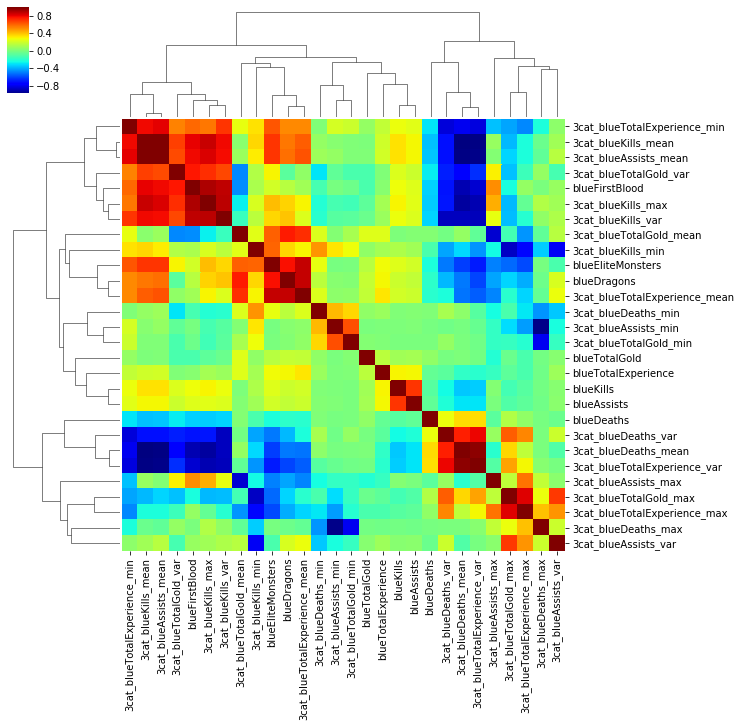

In [16]:
sns.clustermap(train_x.corr(),cmap='jet')

## カテゴリ変数の頻度

In [17]:
for c in cat_cols:
  c_name = c + "_freq"
  freq = train_x[c].value_counts()
  train_x[c_name] = train_x[c].map(freq)
  test_x[c_name] = test_x[c].map(freq)

In [18]:
train_x

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,3cat_blueKills_mean,3cat_blueKills_max,3cat_blueKills_min,3cat_blueKills_var,3cat_blueDeaths_mean,3cat_blueDeaths_max,3cat_blueDeaths_min,3cat_blueDeaths_var,3cat_blueAssists_mean,3cat_blueAssists_max,3cat_blueAssists_min,3cat_blueAssists_var,3cat_blueTotalGold_mean,3cat_blueTotalGold_max,3cat_blueTotalGold_min,3cat_blueTotalGold_var,3cat_blueTotalExperience_mean,3cat_blueTotalExperience_max,3cat_blueTotalExperience_min,3cat_blueTotalExperience_var,blueFirstBlood_freq,blueEliteMonsters_freq,blueDragons_freq
0,0,5,8,6,0,0,14536,17256,4.886648,11.0,0.0,5.412086,7.106091,14.0,0.0,6.517796,4.694232,14.0,0.0,8.935524,17187.288826,20619.0,13475.0,2.569721e+06,17742.613957,20004.0,16650.0,781710.640661,3896,4283,5135
1,1,10,1,5,0,0,14536,17863,6.183389,13.0,0.0,6.401933,5.583055,14.0,0.0,6.256623,5.965440,17.0,0.0,9.219106,16471.674470,20619.0,13475.0,3.463154e+06,17765.074693,20101.0,16650.0,487553.377575,4104,4283,5135
2,0,3,10,2,0,0,17409,17256,4.886648,11.0,0.0,5.412086,7.106091,14.0,0.0,6.517796,4.694232,14.0,0.0,8.935524,17187.288826,20619.0,13475.0,2.569721e+06,17742.613957,20004.0,16650.0,781710.640661,3896,4283,5135
3,1,7,10,8,0,0,19558,18201,6.183389,13.0,0.0,6.401933,5.583055,14.0,0.0,6.256623,5.965440,17.0,0.0,9.219106,16471.674470,20619.0,13475.0,3.463154e+06,17765.074693,20101.0,16650.0,487553.377575,4104,4283,5135
4,0,4,9,4,0,0,17409,17256,4.886648,11.0,0.0,5.412086,7.106091,14.0,0.0,6.517796,4.694232,14.0,0.0,8.935524,17187.288826,20619.0,13475.0,2.569721e+06,17742.613957,20004.0,16650.0,781710.640661,3896,4283,5135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,9,6,14,0,0,18513,18201,6.183389,13.0,0.0,6.401933,5.583055,14.0,0.0,6.256623,5.965440,17.0,0.0,9.219106,16471.674470,20619.0,13475.0,3.463154e+06,17765.074693,20101.0,16650.0,487553.377575,4104,4283,5135
7996,0,3,10,4,0,0,17381,19797,4.886648,11.0,0.0,5.412086,7.106091,14.0,0.0,6.517796,4.694232,14.0,0.0,8.935524,17187.288826,20619.0,13475.0,2.569721e+06,17742.613957,20004.0,16650.0,781710.640661,3896,4283,5135
7997,1,9,3,9,2,1,18274,18491,7.462585,14.0,2.0,7.321892,4.358277,14.0,0.0,3.775892,7.142857,14.0,0.0,6.627273,17396.730159,19558.0,13475.0,4.206540e+06,18177.383220,19730.0,17119.0,87011.586900,4104,592,2865
7998,0,5,10,6,1,1,18274,18491,5.916225,12.0,0.0,5.558792,6.287381,14.0,0.0,7.100976,5.755037,14.0,0.0,10.459038,17782.575822,20619.0,13475.0,2.400974e+06,18370.346766,20004.0,16650.0,603302.655634,3896,3125,2865


In [19]:
test_x

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,3cat_blueKills_mean,3cat_blueKills_max,3cat_blueKills_min,3cat_blueKills_var,3cat_blueDeaths_mean,3cat_blueDeaths_max,3cat_blueDeaths_min,3cat_blueDeaths_var,3cat_blueAssists_mean,3cat_blueAssists_max,3cat_blueAssists_min,3cat_blueAssists_var,3cat_blueTotalGold_mean,3cat_blueTotalGold_max,3cat_blueTotalGold_min,3cat_blueTotalGold_var,3cat_blueTotalExperience_mean,3cat_blueTotalExperience_max,3cat_blueTotalExperience_min,3cat_blueTotalExperience_var,blueFirstBlood_freq,blueEliteMonsters_freq,blueDragons_freq
0,0,7,6,6,0,0,16961,18201,4.924959,11.0,0.0,5.295013,7.055465,14.0,0.0,6.732213,4.613377,14.0,0.0,8.002239,17204.342577,20619.0,13475.0,2.314351e+06,17737.763458,20004.0,16650.0,767888.403107,3896,4283,5135
1,0,6,6,6,2,1,18513,18021,6.153846,11.0,3.0,3.575385,5.423077,10.0,2.0,5.293846,6.384615,11.0,2.0,5.286154,17975.076923,20619.0,13475.0,2.456534e+06,18493.153846,20004.0,17256.0,378921.415385,3896,592,2865
2,1,6,4,3,0,0,13475,17256,6.358140,13.0,0.0,6.202439,5.551163,14.0,1.0,6.257283,6.520930,14.0,0.0,9.173221,16518.920930,20619.0,13475.0,3.867289e+06,17841.300000,20101.0,17119.0,544346.247786,4104,4283,5135
3,0,5,4,7,0,0,17409,17256,4.924959,11.0,0.0,5.295013,7.055465,14.0,0.0,6.732213,4.613377,14.0,0.0,8.002239,17204.342577,20619.0,13475.0,2.314351e+06,17737.763458,20004.0,16650.0,767888.403107,3896,4283,5135
4,0,10,8,9,0,0,18117,18472,4.924959,11.0,0.0,5.295013,7.055465,14.0,0.0,6.732213,4.613377,14.0,0.0,8.002239,17204.342577,20619.0,13475.0,2.314351e+06,17737.763458,20004.0,16650.0,767888.403107,3896,4283,5135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,6,3,7,0,0,17409,17256,4.924959,11.0,0.0,5.295013,7.055465,14.0,0.0,6.732213,4.613377,14.0,0.0,8.002239,17204.342577,20619.0,13475.0,2.314351e+06,17737.763458,20004.0,16650.0,767888.403107,3896,4283,5135
1996,0,4,4,4,0,0,17409,17256,4.924959,11.0,0.0,5.295013,7.055465,14.0,0.0,6.732213,4.613377,14.0,0.0,8.002239,17204.342577,20619.0,13475.0,2.314351e+06,17737.763458,20004.0,16650.0,767888.403107,3896,4283,5135
1997,1,6,3,3,1,1,18513,18201,7.453258,13.0,1.0,7.208746,4.974504,14.0,0.0,5.723780,7.679887,14.0,1.0,10.917123,17712.895184,20619.0,13475.0,2.851587e+06,18268.603399,20004.0,17119.0,246092.728625,4104,3125,2865
1998,1,10,9,9,1,1,18513,18201,7.453258,13.0,1.0,7.208746,4.974504,14.0,0.0,5.723780,7.679887,14.0,1.0,10.917123,17712.895184,20619.0,13475.0,2.851587e+06,18268.603399,20004.0,17119.0,246092.728625,4104,3125,2865


## blueTotalExperience / (blueKills * w1 + blueAssists * w2)

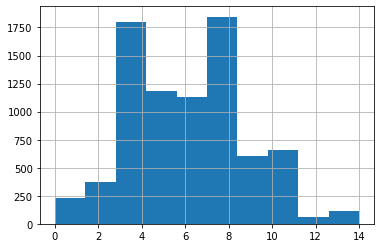

In [20]:
train_x['blueKills'].hist()

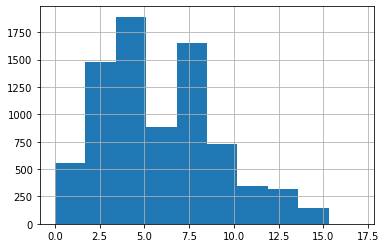

In [21]:
train_x['blueAssists'].hist()

In [22]:
train_x['blueKills'].agg(['mean','max','min','std'])

mean     6.029750
max     14.000000
min      0.000000
std      2.623876
Name: blueKills, dtype: float64

In [23]:
train['blueAssists'].agg(['mean','max','min','std'])

mean     5.881875
max     17.000000
min      0.000000
std      3.189897
Name: blueAssists, dtype: float64

In [24]:
w_1 = train_x['blueAssists'].std()
w_2 = train_x['blueKills'].std()
def f_gold_w(sr):
  if (sr['blueKills'] == 0) and (sr['blueAssists'] == 0):
    return np.nan
  else:
    return sr['blueTotalExperience'] / (sr['blueKills'] * w_1 + sr['blueAssists'] * w_2)
train_x['Exp_w'] = train_x.apply(f_gold_w,axis=1)

w_3 = test_x['blueAssists'].std()
w_4 = test_x['blueKills'].std()
def f_gold_w(sr):
  if (sr['blueKills'] == 0) and (sr['blueAssists'] == 0):
    return np.nan
  else:
    return sr['blueTotalExperience'] / (sr['blueKills'] * w_3 + sr['blueAssists'] * w_4)
test_x['Exp_w'] = test_x.apply(f_gold_w,axis=1)

In [25]:
train_x.isnull().sum()

blueFirstBlood                    0
blueKills                         0
blueDeaths                        0
blueAssists                       0
blueEliteMonsters                 0
blueDragons                       0
blueTotalGold                     0
blueTotalExperience               0
3cat_blueKills_mean               0
3cat_blueKills_max                0
3cat_blueKills_min                0
3cat_blueKills_var                0
3cat_blueDeaths_mean              0
3cat_blueDeaths_max               0
3cat_blueDeaths_min               0
3cat_blueDeaths_var               0
3cat_blueAssists_mean             0
3cat_blueAssists_max              0
3cat_blueAssists_min              0
3cat_blueAssists_var              0
3cat_blueTotalGold_mean           0
3cat_blueTotalGold_max            0
3cat_blueTotalGold_min            0
3cat_blueTotalGold_var            0
3cat_blueTotalExperience_mean     0
3cat_blueTotalExperience_max      0
3cat_blueTotalExperience_min      0
3cat_blueTotalExperience_var

In [26]:
test_x.isnull().sum()

blueFirstBlood                    0
blueKills                         0
blueDeaths                        0
blueAssists                       0
blueEliteMonsters                 0
blueDragons                       0
blueTotalGold                     0
blueTotalExperience               0
3cat_blueKills_mean               0
3cat_blueKills_max                0
3cat_blueKills_min                0
3cat_blueKills_var                0
3cat_blueDeaths_mean              0
3cat_blueDeaths_max               0
3cat_blueDeaths_min               0
3cat_blueDeaths_var               0
3cat_blueAssists_mean             0
3cat_blueAssists_max              0
3cat_blueAssists_min              0
3cat_blueAssists_var              0
3cat_blueTotalGold_mean           0
3cat_blueTotalGold_max            0
3cat_blueTotalGold_min            0
3cat_blueTotalGold_var            0
3cat_blueTotalExperience_mean     0
3cat_blueTotalExperience_max      0
3cat_blueTotalExperience_min      0
3cat_blueTotalExperience_var

In [27]:
len(train_x.columns)

32

In [28]:
len(test_x.columns)

32

## blueTotalGold / (blueKills * w1 + blueAssists * w2)

In [29]:
w_1 = train_x['blueAssists'].std()
w_2 = train_x['blueKills'].std()
def f_gold_w(sr):
  if (sr['blueKills'] == 0) and (sr['blueAssists'] == 0):
    return np.nan
  else:
    return sr['blueTotalGold'] / (sr['blueKills'] * w_1 + sr['blueAssists'] * w_2)
train_x['Gold_w'] = train_x.apply(f_gold_w,axis=1)

w_3 = test_x['blueAssists'].std()
w_4 = test_x['blueKills'].std()
def f_gold_w(sr):
  if (sr['blueKills'] == 0) and (sr['blueAssists'] == 0):
    return np.nan
  else:
    return sr['blueTotalGold'] / (sr['blueKills'] * w_3 + sr['blueAssists'] * w_4)
test_x['Gold_w'] = test_x.apply(f_gold_w,axis=1)

In [30]:
train_x

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,3cat_blueKills_mean,3cat_blueKills_max,3cat_blueKills_min,3cat_blueKills_var,3cat_blueDeaths_mean,3cat_blueDeaths_max,3cat_blueDeaths_min,3cat_blueDeaths_var,3cat_blueAssists_mean,3cat_blueAssists_max,3cat_blueAssists_min,3cat_blueAssists_var,3cat_blueTotalGold_mean,3cat_blueTotalGold_max,3cat_blueTotalGold_min,3cat_blueTotalGold_var,3cat_blueTotalExperience_mean,3cat_blueTotalExperience_max,3cat_blueTotalExperience_min,3cat_blueTotalExperience_var,blueFirstBlood_freq,blueEliteMonsters_freq,blueDragons_freq,Exp_w,Gold_w
0,0,5,8,6,0,0,14536,17256,4.886648,11.0,0.0,5.412086,7.106091,14.0,0.0,6.517796,4.694232,14.0,0.0,8.935524,17187.288826,20619.0,13475.0,2.569721e+06,17742.613957,20004.0,16650.0,781710.640661,3896,4283,5135,544.477980,458.653913
1,1,10,1,5,0,0,14536,17863,6.183389,13.0,0.0,6.401933,5.583055,14.0,0.0,6.256623,5.965440,17.0,0.0,9.219106,16471.674470,20619.0,13475.0,3.463154e+06,17765.074693,20101.0,16650.0,487553.377575,4104,4283,5135,396.793742,322.890547
2,0,3,10,2,0,0,17409,17256,4.886648,11.0,0.0,5.412086,7.106091,14.0,0.0,6.517796,4.694232,14.0,0.0,8.935524,17187.288826,20619.0,13475.0,2.569721e+06,17742.613957,20004.0,16650.0,781710.640661,3896,4283,5135,1164.573374,1174.899042
3,1,7,10,8,0,0,19558,18201,6.183389,13.0,0.0,6.401933,5.583055,14.0,0.0,6.256623,5.965440,17.0,0.0,9.219106,16471.674470,20619.0,13475.0,3.463154e+06,17765.074693,20101.0,16650.0,487553.377575,4104,4283,5135,420.149561,451.474376
4,0,4,9,4,0,0,17409,17256,4.886648,11.0,0.0,5.412086,7.106091,14.0,0.0,6.517796,4.694232,14.0,0.0,8.935524,17187.288826,20619.0,13475.0,2.569721e+06,17742.613957,20004.0,16650.0,781710.640661,3896,4283,5135,742.031018,748.610222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,9,6,14,0,0,18513,18201,6.183389,13.0,0.0,6.401933,5.583055,14.0,0.0,6.256623,5.965440,17.0,0.0,9.219106,16471.674470,20619.0,13475.0,3.463154e+06,17765.074693,20101.0,16650.0,487553.377575,4104,4283,5135,278.118452,282.885935
7996,0,3,10,4,0,0,17381,19797,4.886648,11.0,0.0,5.412086,7.106091,14.0,0.0,6.517796,4.694232,14.0,0.0,8.935524,17187.288826,20619.0,13475.0,2.569721e+06,17742.613957,20004.0,16650.0,781710.640661,3896,4283,5135,986.633798,866.226299
7997,1,9,3,9,2,1,18274,18491,7.462585,14.0,2.0,7.321892,4.358277,14.0,0.0,3.775892,7.142857,14.0,0.0,6.627273,17396.730159,19558.0,13475.0,4.206540e+06,18177.383220,19730.0,17119.0,87011.586900,4104,592,2865,353.394518,349.247278
7998,0,5,10,6,1,1,18274,18491,5.916225,12.0,0.0,5.558792,6.287381,14.0,0.0,7.100976,5.755037,14.0,0.0,10.459038,17782.575822,20619.0,13475.0,2.400974e+06,18370.346766,20004.0,16650.0,603302.655634,3896,3125,2865,583.445893,576.598899


In [31]:
train_x.isnull().sum()

blueFirstBlood                    0
blueKills                         0
blueDeaths                        0
blueAssists                       0
blueEliteMonsters                 0
blueDragons                       0
blueTotalGold                     0
blueTotalExperience               0
3cat_blueKills_mean               0
3cat_blueKills_max                0
3cat_blueKills_min                0
3cat_blueKills_var                0
3cat_blueDeaths_mean              0
3cat_blueDeaths_max               0
3cat_blueDeaths_min               0
3cat_blueDeaths_var               0
3cat_blueAssists_mean             0
3cat_blueAssists_max              0
3cat_blueAssists_min              0
3cat_blueAssists_var              0
3cat_blueTotalGold_mean           0
3cat_blueTotalGold_max            0
3cat_blueTotalGold_min            0
3cat_blueTotalGold_var            0
3cat_blueTotalExperience_mean     0
3cat_blueTotalExperience_max      0
3cat_blueTotalExperience_min      0
3cat_blueTotalExperience_var

In [32]:
test_x.isnull().sum()

blueFirstBlood                    0
blueKills                         0
blueDeaths                        0
blueAssists                       0
blueEliteMonsters                 0
blueDragons                       0
blueTotalGold                     0
blueTotalExperience               0
3cat_blueKills_mean               0
3cat_blueKills_max                0
3cat_blueKills_min                0
3cat_blueKills_var                0
3cat_blueDeaths_mean              0
3cat_blueDeaths_max               0
3cat_blueDeaths_min               0
3cat_blueDeaths_var               0
3cat_blueAssists_mean             0
3cat_blueAssists_max              0
3cat_blueAssists_min              0
3cat_blueAssists_var              0
3cat_blueTotalGold_mean           0
3cat_blueTotalGold_max            0
3cat_blueTotalGold_min            0
3cat_blueTotalGold_var            0
3cat_blueTotalExperience_mean     0
3cat_blueTotalExperience_max      0
3cat_blueTotalExperience_min      0
3cat_blueTotalExperience_var

In [33]:
# 数値変数の欠損値を学習データの平均で埋める
for col in ['Exp_w','Gold_w']:
    train_x[col].fillna(train_x[col].mean(), inplace=True)
    test_x[col].fillna(test_x[col].mean(), inplace=True)

In [34]:
len(train_x.columns)

33

In [35]:
len(test_x.columns)

33

In [36]:
train_x.isnull().sum()

blueFirstBlood                   0
blueKills                        0
blueDeaths                       0
blueAssists                      0
blueEliteMonsters                0
blueDragons                      0
blueTotalGold                    0
blueTotalExperience              0
3cat_blueKills_mean              0
3cat_blueKills_max               0
3cat_blueKills_min               0
3cat_blueKills_var               0
3cat_blueDeaths_mean             0
3cat_blueDeaths_max              0
3cat_blueDeaths_min              0
3cat_blueDeaths_var              0
3cat_blueAssists_mean            0
3cat_blueAssists_max             0
3cat_blueAssists_min             0
3cat_blueAssists_var             0
3cat_blueTotalGold_mean          0
3cat_blueTotalGold_max           0
3cat_blueTotalGold_min           0
3cat_blueTotalGold_var           0
3cat_blueTotalExperience_mean    0
3cat_blueTotalExperience_max     0
3cat_blueTotalExperience_min     0
3cat_blueTotalExperience_var     0
blueFirstBlood_freq 

In [37]:
test_x.isnull().sum()

blueFirstBlood                   0
blueKills                        0
blueDeaths                       0
blueAssists                      0
blueEliteMonsters                0
blueDragons                      0
blueTotalGold                    0
blueTotalExperience              0
3cat_blueKills_mean              0
3cat_blueKills_max               0
3cat_blueKills_min               0
3cat_blueKills_var               0
3cat_blueDeaths_mean             0
3cat_blueDeaths_max              0
3cat_blueDeaths_min              0
3cat_blueDeaths_var              0
3cat_blueAssists_mean            0
3cat_blueAssists_max             0
3cat_blueAssists_min             0
3cat_blueAssists_var             0
3cat_blueTotalGold_mean          0
3cat_blueTotalGold_max           0
3cat_blueTotalGold_min           0
3cat_blueTotalGold_var           0
3cat_blueTotalExperience_mean    0
3cat_blueTotalExperience_max     0
3cat_blueTotalExperience_min     0
3cat_blueTotalExperience_var     0
blueFirstBlood_freq 

## blueKills - blueDeaths

In [38]:
train_x['diff_Kill_Death'] = train_x['blueKills'] - train_x['blueDeaths']
test_x['diff_Kill_Death'] = test_x['blueKills'] - test_x['blueDeaths']

In [39]:
train_x.isnull().sum()

blueFirstBlood                   0
blueKills                        0
blueDeaths                       0
blueAssists                      0
blueEliteMonsters                0
blueDragons                      0
blueTotalGold                    0
blueTotalExperience              0
3cat_blueKills_mean              0
3cat_blueKills_max               0
3cat_blueKills_min               0
3cat_blueKills_var               0
3cat_blueDeaths_mean             0
3cat_blueDeaths_max              0
3cat_blueDeaths_min              0
3cat_blueDeaths_var              0
3cat_blueAssists_mean            0
3cat_blueAssists_max             0
3cat_blueAssists_min             0
3cat_blueAssists_var             0
3cat_blueTotalGold_mean          0
3cat_blueTotalGold_max           0
3cat_blueTotalGold_min           0
3cat_blueTotalGold_var           0
3cat_blueTotalExperience_mean    0
3cat_blueTotalExperience_max     0
3cat_blueTotalExperience_min     0
3cat_blueTotalExperience_var     0
blueFirstBlood_freq 

In [40]:
test_x.isnull().sum()

blueFirstBlood                   0
blueKills                        0
blueDeaths                       0
blueAssists                      0
blueEliteMonsters                0
blueDragons                      0
blueTotalGold                    0
blueTotalExperience              0
3cat_blueKills_mean              0
3cat_blueKills_max               0
3cat_blueKills_min               0
3cat_blueKills_var               0
3cat_blueDeaths_mean             0
3cat_blueDeaths_max              0
3cat_blueDeaths_min              0
3cat_blueDeaths_var              0
3cat_blueAssists_mean            0
3cat_blueAssists_max             0
3cat_blueAssists_min             0
3cat_blueAssists_var             0
3cat_blueTotalGold_mean          0
3cat_blueTotalGold_max           0
3cat_blueTotalGold_min           0
3cat_blueTotalGold_var           0
3cat_blueTotalExperience_mean    0
3cat_blueTotalExperience_max     0
3cat_blueTotalExperience_min     0
3cat_blueTotalExperience_var     0
blueFirstBlood_freq 

In [41]:
len(train_x.columns)

34

In [42]:
len(test_x.columns)

34

In [43]:
train_x.corr()

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,3cat_blueKills_mean,3cat_blueKills_max,3cat_blueKills_min,3cat_blueKills_var,3cat_blueDeaths_mean,3cat_blueDeaths_max,3cat_blueDeaths_min,3cat_blueDeaths_var,3cat_blueAssists_mean,3cat_blueAssists_max,3cat_blueAssists_min,3cat_blueAssists_var,3cat_blueTotalGold_mean,3cat_blueTotalGold_max,3cat_blueTotalGold_min,3cat_blueTotalGold_var,3cat_blueTotalExperience_mean,3cat_blueTotalExperience_max,3cat_blueTotalExperience_min,3cat_blueTotalExperience_var,blueFirstBlood_freq,blueEliteMonsters_freq,blueDragons_freq,Exp_w,Gold_w,diff_Kill_Death
blueFirstBlood,1.000000,0.283559,-0.325833,0.241781,0.213862,0.155051,-0.111157,0.033651,0.818176,0.920348,0.120735,0.891167,-0.893268,0.005036,-0.120436,-0.697380,0.803288,0.525442,0.000095,0.078594,-0.456002,-0.224729,-0.028282,0.767734,0.100442,0.065142,0.598189,-0.841252,1.000000,-0.202931,-0.155051,-0.210972,-0.223721,0.414785
blueKills,0.283559,1.000000,-0.079929,0.710046,0.246184,0.196728,0.099387,0.309264,0.346575,0.303358,0.126808,0.277192,-0.340386,-0.010613,0.024105,-0.245816,0.344569,0.026031,0.013192,0.032788,0.016274,-0.129431,0.007169,0.239199,0.216436,-0.076638,0.278943,-0.337017,0.283559,-0.225284,-0.196728,-0.605444,-0.593464,0.731842
blueDeaths,-0.325833,-0.079929,1.000000,-0.060368,-0.223138,-0.180798,0.060901,-0.051879,-0.358252,-0.337877,-0.112667,-0.317819,0.364766,0.000443,0.018210,0.276508,-0.354941,-0.069306,-0.000128,-0.034090,0.024698,0.134614,0.001749,-0.273551,-0.184820,0.059968,-0.287375,0.355207,-0.325833,0.204810,0.180798,0.039591,0.050094,-0.737789
blueAssists,0.241781,0.710046,-0.060368,1.000000,0.213466,0.176668,0.108863,0.301567,0.299246,0.253271,0.097319,0.238959,-0.292881,-0.017922,0.026936,-0.212289,0.300989,0.008777,0.020127,0.045173,0.025485,-0.097197,0.006566,0.199774,0.195065,-0.066178,0.249657,-0.289922,0.241781,-0.190088,-0.176668,-0.579086,-0.566202,0.522113
blueEliteMonsters,0.213862,0.246184,-0.223138,0.213466,1.000000,0.787022,0.149436,0.295139,0.710334,0.420299,0.607525,0.372447,-0.611730,-0.002750,0.268326,-0.501362,0.709216,-0.479152,-0.006424,-0.107902,0.613032,-0.528953,0.001589,0.306314,0.880946,-0.587320,0.636241,-0.681719,0.213862,-0.962612,-0.787022,-0.168195,-0.165085,0.319266
blueDragons,0.155051,0.196728,-0.180798,0.176668,0.787022,1.000000,0.185465,0.295516,0.567633,0.378841,0.367541,0.408326,-0.495656,-0.027454,0.156723,-0.377589,0.586960,-0.413551,0.032780,0.225893,0.760833,-0.317327,0.026456,-0.070269,0.882069,-0.396224,0.534801,-0.602015,0.155051,-0.707037,-1.000000,-0.131795,-0.126580,0.256828
blueTotalGold,-0.111157,0.099387,0.060901,0.108863,0.149436,0.185465,1.000000,0.162229,0.011446,-0.064092,0.061623,-0.036697,0.016505,-0.013018,0.057041,-0.002059,0.020640,-0.204861,0.006408,0.037014,0.243765,-0.030699,0.028091,-0.113840,0.177541,-0.108691,0.065611,-0.013402,-0.111157,-0.130761,-0.185465,-0.005145,0.092246,0.025669
blueTotalExperience,0.033651,0.309264,-0.051879,0.301567,0.295139,0.295516,0.162229,1.000000,0.209224,0.103395,0.103137,0.079065,-0.169752,-0.016545,0.080518,-0.073346,0.217124,-0.160195,0.016378,0.092320,0.244009,-0.061982,0.019889,0.020645,0.335026,-0.107995,0.177523,-0.184955,0.033651,-0.251059,-0.295516,-0.175855,-0.203505,0.244901
3cat_blueKills_mean,0.818176,0.346575,-0.358252,0.299246,0.710334,0.567633,0.011446,0.209224,1.000000,0.875304,0.365889,0.799804,-0.982142,-0.030622,0.069551,-0.709273,0.994212,0.075108,0.038063,0.094606,0.046956,-0.373458,0.020685,0.690179,0.624501,-0.221129,0.804857,-0.972423,0.818176,-0.650029,-0.567633,-0.248981,-0.256574,0.479623
3cat_blueKills_max,0.920348,0.303358,-0.337877,0.253271,0.420299,0.378841,-0.064092,0.103395,0.875304,1.000000,0.227546,0.893365,-0.926286,0.136324,-0.204729,-0.693096,0.841463,0.454685,-0.121994,0.094951,-0.262924,-0.373383,-0.135023,0.726841,0.308618,-0.047974,0.573046,-0.895896,0.920348,-0.407534,-0.378841,-0.222350,-0.233618,0.436427


In [44]:
train_x.isnull().sum()

blueFirstBlood                   0
blueKills                        0
blueDeaths                       0
blueAssists                      0
blueEliteMonsters                0
blueDragons                      0
blueTotalGold                    0
blueTotalExperience              0
3cat_blueKills_mean              0
3cat_blueKills_max               0
3cat_blueKills_min               0
3cat_blueKills_var               0
3cat_blueDeaths_mean             0
3cat_blueDeaths_max              0
3cat_blueDeaths_min              0
3cat_blueDeaths_var              0
3cat_blueAssists_mean            0
3cat_blueAssists_max             0
3cat_blueAssists_min             0
3cat_blueAssists_var             0
3cat_blueTotalGold_mean          0
3cat_blueTotalGold_max           0
3cat_blueTotalGold_min           0
3cat_blueTotalGold_var           0
3cat_blueTotalExperience_mean    0
3cat_blueTotalExperience_max     0
3cat_blueTotalExperience_min     0
3cat_blueTotalExperience_var     0
blueFirstBlood_freq 

In [45]:
train_x

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,3cat_blueKills_mean,3cat_blueKills_max,3cat_blueKills_min,3cat_blueKills_var,3cat_blueDeaths_mean,3cat_blueDeaths_max,3cat_blueDeaths_min,3cat_blueDeaths_var,3cat_blueAssists_mean,3cat_blueAssists_max,3cat_blueAssists_min,3cat_blueAssists_var,3cat_blueTotalGold_mean,3cat_blueTotalGold_max,3cat_blueTotalGold_min,3cat_blueTotalGold_var,3cat_blueTotalExperience_mean,3cat_blueTotalExperience_max,3cat_blueTotalExperience_min,3cat_blueTotalExperience_var,blueFirstBlood_freq,blueEliteMonsters_freq,blueDragons_freq,Exp_w,Gold_w,diff_Kill_Death
0,0,5,8,6,0,0,14536,17256,4.886648,11.0,0.0,5.412086,7.106091,14.0,0.0,6.517796,4.694232,14.0,0.0,8.935524,17187.288826,20619.0,13475.0,2.569721e+06,17742.613957,20004.0,16650.0,781710.640661,3896,4283,5135,544.477980,458.653913,-3
1,1,10,1,5,0,0,14536,17863,6.183389,13.0,0.0,6.401933,5.583055,14.0,0.0,6.256623,5.965440,17.0,0.0,9.219106,16471.674470,20619.0,13475.0,3.463154e+06,17765.074693,20101.0,16650.0,487553.377575,4104,4283,5135,396.793742,322.890547,9
2,0,3,10,2,0,0,17409,17256,4.886648,11.0,0.0,5.412086,7.106091,14.0,0.0,6.517796,4.694232,14.0,0.0,8.935524,17187.288826,20619.0,13475.0,2.569721e+06,17742.613957,20004.0,16650.0,781710.640661,3896,4283,5135,1164.573374,1174.899042,-7
3,1,7,10,8,0,0,19558,18201,6.183389,13.0,0.0,6.401933,5.583055,14.0,0.0,6.256623,5.965440,17.0,0.0,9.219106,16471.674470,20619.0,13475.0,3.463154e+06,17765.074693,20101.0,16650.0,487553.377575,4104,4283,5135,420.149561,451.474376,-3
4,0,4,9,4,0,0,17409,17256,4.886648,11.0,0.0,5.412086,7.106091,14.0,0.0,6.517796,4.694232,14.0,0.0,8.935524,17187.288826,20619.0,13475.0,2.569721e+06,17742.613957,20004.0,16650.0,781710.640661,3896,4283,5135,742.031018,748.610222,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,9,6,14,0,0,18513,18201,6.183389,13.0,0.0,6.401933,5.583055,14.0,0.0,6.256623,5.965440,17.0,0.0,9.219106,16471.674470,20619.0,13475.0,3.463154e+06,17765.074693,20101.0,16650.0,487553.377575,4104,4283,5135,278.118452,282.885935,3
7996,0,3,10,4,0,0,17381,19797,4.886648,11.0,0.0,5.412086,7.106091,14.0,0.0,6.517796,4.694232,14.0,0.0,8.935524,17187.288826,20619.0,13475.0,2.569721e+06,17742.613957,20004.0,16650.0,781710.640661,3896,4283,5135,986.633798,866.226299,-7
7997,1,9,3,9,2,1,18274,18491,7.462585,14.0,2.0,7.321892,4.358277,14.0,0.0,3.775892,7.142857,14.0,0.0,6.627273,17396.730159,19558.0,13475.0,4.206540e+06,18177.383220,19730.0,17119.0,87011.586900,4104,592,2865,353.394518,349.247278,6
7998,0,5,10,6,1,1,18274,18491,5.916225,12.0,0.0,5.558792,6.287381,14.0,0.0,7.100976,5.755037,14.0,0.0,10.459038,17782.575822,20619.0,13475.0,2.400974e+06,18370.346766,20004.0,16650.0,603302.655634,3896,3125,2865,583.445893,576.598899,-5


In [46]:
num_cols_2 = list(set(train_x.columns) - set(cat_cols))
num_cols_2

['3cat_blueTotalGold_var',
 '3cat_blueAssists_max',
 'blueFirstBlood_freq',
 '3cat_blueDeaths_var',
 '3cat_blueDeaths_max',
 '3cat_blueAssists_min',
 'blueKills',
 'blueDeaths',
 'blueTotalExperience',
 '3cat_blueAssists_var',
 'Gold_w',
 'Exp_w',
 'blueEliteMonsters_freq',
 '3cat_blueDeaths_min',
 '3cat_blueAssists_mean',
 '3cat_blueTotalExperience_max',
 'diff_Kill_Death',
 '3cat_blueTotalGold_max',
 '3cat_blueTotalExperience_min',
 '3cat_blueTotalGold_mean',
 '3cat_blueDeaths_mean',
 '3cat_blueTotalGold_min',
 '3cat_blueKills_max',
 '3cat_blueKills_mean',
 '3cat_blueTotalExperience_var',
 '3cat_blueKills_var',
 'blueDragons_freq',
 'blueTotalGold',
 '3cat_blueKills_min',
 '3cat_blueTotalExperience_mean',
 'blueAssists']

In [47]:
cat_cols

['blueFirstBlood', 'blueEliteMonsters', 'blueDragons']

In [48]:
# sns.pairplot(train_x[train_x.columns[0:10]])

In [49]:
# sns.pairplot(train_x[train_x.columns[11:20]])

In [50]:
# sns.pairplot(train_x[train_x.columns[21:30]])

## Kmeansクラスタリング

In [51]:
train_x.columns

Index(['blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueTotalGold',
       'blueTotalExperience', '3cat_blueKills_mean', '3cat_blueKills_max',
       '3cat_blueKills_min', '3cat_blueKills_var', '3cat_blueDeaths_mean',
       '3cat_blueDeaths_max', '3cat_blueDeaths_min', '3cat_blueDeaths_var',
       '3cat_blueAssists_mean', '3cat_blueAssists_max', '3cat_blueAssists_min',
       '3cat_blueAssists_var', '3cat_blueTotalGold_mean',
       '3cat_blueTotalGold_max', '3cat_blueTotalGold_min',
       '3cat_blueTotalGold_var', '3cat_blueTotalExperience_mean',
       '3cat_blueTotalExperience_max', '3cat_blueTotalExperience_min',
       '3cat_blueTotalExperience_var', 'blueFirstBlood_freq',
       'blueEliteMonsters_freq', 'blueDragons_freq', 'Exp_w', 'Gold_w',
       'diff_Kill_Death'],
      dtype='object')

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [53]:
customer_clustering = train_x[['Exp_w','Gold_w','diff_Kill_Death','blueFirstBlood','blueEliteMonsters','blueDragons','blueTotalExperience']].copy()
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering["cluster"] = clusters.labels_
print(customer_clustering["cluster"].unique())
customer_clustering.head()

[2 0 1 3]


,Exp_w,Gold_w,diff_Kill_Death,blueFirstBlood,blueEliteMonsters,blueDragons,blueTotalExperience,cluster
0,544.477980,458.653913,-3,0,0,0,17256,2
1,396.793742,322.890547,9,1,0,0,17863,0
2,1164.573374,1174.899042,-7,0,0,0,17256,2
3,420.149561,451.474376,-3,1,0,0,18201,0
4,742.031018,748.610222,-5,0,0,0,17256,2


In [54]:
train_x['cluster'] = customer_clustering['cluster']

In [55]:
customer_clustering = test_x[['Exp_w','Gold_w','diff_Kill_Death','blueFirstBlood','blueEliteMonsters','blueDragons','blueTotalExperience']].copy()
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering["cluster"] = clusters.labels_
print(customer_clustering["cluster"].unique())
customer_clustering.head()

[0 2 1 3]


,Exp_w,Gold_w,diff_Kill_Death,blueFirstBlood,blueEliteMonsters,blueDragons,blueTotalExperience,cluster
0,468.714432,436.781796,1,0,0,0,18201,0
1,506.725171,520.559519,0,0,2,1,18021,2
2,625.532472,488.470681,2,1,0,0,17256,0
3,493.666768,498.043855,1,0,0,0,17256,1
4,326.282169,320.011588,2,0,0,0,18472,0


In [56]:
test_x['cluster'] = customer_clustering['cluster']

In [57]:
# 対数変換
train_x[num_cols_2] = np.sign(train_x[num_cols_2]) * np.log1p(np.abs(train_x[num_cols_2]))
test_x[num_cols_2] = np.sign(test_x[num_cols_2]) * np.log1p(np.abs(test_x[num_cols_2]))

In [58]:
train_x

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,3cat_blueKills_mean,3cat_blueKills_max,3cat_blueKills_min,3cat_blueKills_var,3cat_blueDeaths_mean,3cat_blueDeaths_max,3cat_blueDeaths_min,3cat_blueDeaths_var,3cat_blueAssists_mean,3cat_blueAssists_max,3cat_blueAssists_min,3cat_blueAssists_var,3cat_blueTotalGold_mean,3cat_blueTotalGold_max,3cat_blueTotalGold_min,3cat_blueTotalGold_var,3cat_blueTotalExperience_mean,3cat_blueTotalExperience_max,3cat_blueTotalExperience_min,3cat_blueTotalExperience_var,blueFirstBlood_freq,blueEliteMonsters_freq,blueDragons_freq,Exp_w,Gold_w,diff_Kill_Death,cluster
0,0,1.791759,2.197225,1.945910,0,0,9.584452,9.755973,1.772687,2.484907,0.000000,1.858185,2.092616,2.70805,0.0,2.017273,1.739454,2.708050,0.0,2.296117,9.751984,9.934017,9.508666,14.759308,9.783781,9.903738,9.720226,13.569241,8.267962,8.362642,8.544030,6.301662,6.130474,-1.386294,2
1,1,2.397895,0.693147,1.791759,0,0,9.584452,9.790543,1.971771,2.639057,0.000000,2.001741,1.884499,2.70805,0.0,1.981915,1.940961,2.890372,0.0,2.324259,9.709458,9.934017,9.508666,15.057691,9.785046,9.908575,9.720226,13.097157,8.319961,8.362642,8.544030,5.985934,5.780406,2.302585,0
2,0,1.386294,2.397895,1.098612,0,0,9.764800,9.755973,1.772687,2.484907,0.000000,1.858185,2.092616,2.70805,0.0,2.017273,1.739454,2.708050,0.0,2.296117,9.751984,9.934017,9.508666,14.759308,9.783781,9.903738,9.720226,13.569241,8.267962,8.362642,8.544030,7.060968,7.069788,-2.079442,2
3,1,2.079442,2.397895,2.197225,0,0,9.881191,9.809287,1.971771,2.639057,0.000000,2.001741,1.884499,2.70805,0.0,1.981915,1.940961,2.890372,0.0,2.324259,9.709458,9.934017,9.508666,15.057691,9.785046,9.908575,9.720226,13.097157,8.319961,8.362642,8.544030,6.042988,6.114731,-1.386294,0
4,0,1.609438,2.302585,1.609438,0,0,9.764800,9.755973,1.772687,2.484907,0.000000,1.858185,2.092616,2.70805,0.0,2.017273,1.739454,2.708050,0.0,2.296117,9.751984,9.934017,9.508666,14.759308,9.783781,9.903738,9.720226,13.569241,8.267962,8.362642,8.544030,6.610738,6.619553,-1.791759,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,2.302585,1.945910,2.708050,0,0,9.826282,9.809287,1.971771,2.639057,0.000000,2.001741,1.884499,2.70805,0.0,1.981915,1.940961,2.890372,0.0,2.324259,9.709458,9.934017,9.508666,15.057691,9.785046,9.908575,9.720226,13.097157,8.319961,8.362642,8.544030,5.631636,5.648573,1.386294,0
7996,0,1.386294,2.397895,1.609438,0,0,9.763190,9.893336,1.772687,2.484907,0.000000,1.858185,2.092616,2.70805,0.0,2.017273,1.739454,2.708050,0.0,2.296117,9.751984,9.934017,9.508666,14.759308,9.783781,9.903738,9.720226,13.569241,8.267962,8.362642,8.544030,6.895312,6.765300,-2.079442,2
7997,1,2.302585,1.386294,2.302585,2,1,9.813289,9.825093,2.135655,2.708050,1.098612,2.118890,1.678642,2.70805,0.0,1.563581,2.097141,2.708050,0.0,2.031730,9.764095,9.881191,9.508666,15.252151,9.807988,9.889946,9.748003,11.373808,8.319961,6.385194,7.960673,5.870411,5.858639,1.945910,1
7998,0,1.791759,2.397895,1.945910,1,1,9.813289,9.825093,1.933870,2.564949,0.000000,1.880806,1.986144,2.70805,0.0,2.091985,1.910288,2.708050,0.0,2.438779,9.786031,9.934017,9.508666,14.691386,9.818547,9.903738,9.720226,13.310176,8.267962,8.047510,7.960673,6.370664,6.358880,-1.791759,1


In [60]:
cat_cols = ['blueFirstBlood', 'blueEliteMonsters', 'blueDragons', 'cluster']

In [61]:
from sklearn.model_selection import KFold

train_x = train_x.copy()
test_x = test_x.copy()
target = 'blueWins'

# target encoding
for c in cat_cols:
  # 各カテゴリにおけるtargetの平均を計算
  data_tmp = pd.DataFrame({c: train_x[c], target : train_y})
  target_mean = data_tmp.groupby(c)[target].mean()
  #テストデータのカテゴリを置換
  test_x[c] = test_x[c].map(target_mean)
  
  #学習データの変換後の値を格納する配列を準備
  tmp = np.repeat(np.nan, train_x.shape[0])
  
  kf = KFold(n_splits=4, shuffle=True, random_state=72)
  for idx_1, idx_2 in kf.split(train_x):
    # out-of-foldで各カテゴリにおける目的変数の平均を計算
    target_mean = data_tmp.iloc[idx_1].groupby(c)[target].mean()
    # 変換後の値を一時配列に格納
    tmp[idx_2] = train_x[c].iloc[idx_2].map(target_mean)
    
  train_x[c] = tmp

In [62]:
train_x

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,3cat_blueKills_mean,3cat_blueKills_max,3cat_blueKills_min,3cat_blueKills_var,3cat_blueDeaths_mean,3cat_blueDeaths_max,3cat_blueDeaths_min,3cat_blueDeaths_var,3cat_blueAssists_mean,3cat_blueAssists_max,3cat_blueAssists_min,3cat_blueAssists_var,3cat_blueTotalGold_mean,3cat_blueTotalGold_max,3cat_blueTotalGold_min,3cat_blueTotalGold_var,3cat_blueTotalExperience_mean,3cat_blueTotalExperience_max,3cat_blueTotalExperience_min,3cat_blueTotalExperience_var,blueFirstBlood_freq,blueEliteMonsters_freq,blueDragons_freq,Exp_w,Gold_w,diff_Kill_Death,cluster
0,0.384720,1.791759,2.197225,1.945910,0.377125,0.409243,9.584452,9.755973,1.772687,2.484907,0.000000,1.858185,2.092616,2.70805,0.0,2.017273,1.739454,2.708050,0.0,2.296117,9.751984,9.934017,9.508666,14.759308,9.783781,9.903738,9.720226,13.569241,8.267962,8.362642,8.544030,6.301662,6.130474,-1.386294,0.226723
1,0.607166,2.397895,0.693147,1.791759,0.362637,0.396040,9.584452,9.790543,1.971771,2.639057,0.000000,2.001741,1.884499,2.70805,0.0,1.981915,1.940961,2.890372,0.0,2.324259,9.709458,9.934017,9.508666,15.057691,9.785046,9.908575,9.720226,13.097157,8.319961,8.362642,8.544030,5.985934,5.780406,2.302585,0.574774
2,0.384720,1.386294,2.397895,1.098612,0.377125,0.409243,9.764800,9.755973,1.772687,2.484907,0.000000,1.858185,2.092616,2.70805,0.0,2.017273,1.739454,2.708050,0.0,2.296117,9.751984,9.934017,9.508666,14.759308,9.783781,9.903738,9.720226,13.569241,8.267962,8.362642,8.544030,7.060968,7.069788,-2.079442,0.226723
3,0.607166,2.079442,2.397895,2.197225,0.362637,0.396040,9.881191,9.809287,1.971771,2.639057,0.000000,2.001741,1.884499,2.70805,0.0,1.981915,1.940961,2.890372,0.0,2.324259,9.709458,9.934017,9.508666,15.057691,9.785046,9.908575,9.720226,13.097157,8.319961,8.362642,8.544030,6.042988,6.114731,-1.386294,0.574774
4,0.384720,1.609438,2.302585,1.609438,0.377125,0.409243,9.764800,9.755973,1.772687,2.484907,0.000000,1.858185,2.092616,2.70805,0.0,2.017273,1.739454,2.708050,0.0,2.296117,9.751984,9.934017,9.508666,14.759308,9.783781,9.903738,9.720226,13.569241,8.267962,8.362642,8.544030,6.610738,6.619553,-1.791759,0.226723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.607166,2.302585,1.945910,2.708050,0.362637,0.396040,9.826282,9.809287,1.971771,2.639057,0.000000,2.001741,1.884499,2.70805,0.0,1.981915,1.940961,2.890372,0.0,2.324259,9.709458,9.934017,9.508666,15.057691,9.785046,9.908575,9.720226,13.097157,8.319961,8.362642,8.544030,5.631636,5.648573,1.386294,0.574774
7996,0.384720,1.386294,2.397895,1.609438,0.377125,0.409243,9.763190,9.893336,1.772687,2.484907,0.000000,1.858185,2.092616,2.70805,0.0,2.017273,1.739454,2.708050,0.0,2.296117,9.751984,9.934017,9.508666,14.759308,9.783781,9.903738,9.720226,13.569241,8.267962,8.362642,8.544030,6.895312,6.765300,-2.079442,0.226723
7997,0.608511,2.302585,1.386294,2.302585,0.732265,0.661495,9.813289,9.825093,2.135655,2.708050,1.098612,2.118890,1.678642,2.70805,0.0,1.563581,2.097141,2.708050,0.0,2.031730,9.764095,9.881191,9.508666,15.252151,9.807988,9.889946,9.748003,11.373808,8.319961,6.385194,7.960673,5.870411,5.858639,1.945910,0.676158
7998,0.384720,1.791759,2.397895,1.945910,0.623711,0.661495,9.813289,9.825093,1.933870,2.564949,0.000000,1.880806,1.986144,2.70805,0.0,2.091985,1.910288,2.708050,0.0,2.438779,9.786031,9.934017,9.508666,14.691386,9.818547,9.903738,9.720226,13.310176,8.267962,8.047510,7.960673,6.370664,6.358880,-1.791759,0.676158


In [63]:
test_x

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,3cat_blueKills_mean,3cat_blueKills_max,3cat_blueKills_min,3cat_blueKills_var,3cat_blueDeaths_mean,3cat_blueDeaths_max,3cat_blueDeaths_min,3cat_blueDeaths_var,3cat_blueAssists_mean,3cat_blueAssists_max,3cat_blueAssists_min,3cat_blueAssists_var,3cat_blueTotalGold_mean,3cat_blueTotalGold_max,3cat_blueTotalGold_min,3cat_blueTotalGold_var,3cat_blueTotalExperience_mean,3cat_blueTotalExperience_max,3cat_blueTotalExperience_min,3cat_blueTotalExperience_var,blueFirstBlood_freq,blueEliteMonsters_freq,blueDragons_freq,Exp_w,Gold_w,diff_Kill_Death,cluster
0,0.375513,2.079442,1.945910,1.945910,0.365165,0.397663,9.738731,9.809287,1.779174,2.484907,0.000000,1.839758,2.086351,2.708050,0.000000,2.045395,1.725152,2.708050,0.000000,2.197473,9.752975,9.934017,9.508666,14.654640,9.783508,9.903738,9.720226,13.551401,8.267962,8.362642,8.544030,6.152125,6.081721,0.693147,0.580080
1,0.375513,1.945910,1.945910,1.945910,0.736486,0.660384,9.826282,9.799349,1.967650,2.484907,1.386294,1.520691,1.859897,2.397895,1.098612,1.839572,1.999399,2.484907,1.098612,1.838349,9.796797,9.934017,9.508666,14.714262,9.825210,9.903738,9.755973,12.845087,8.267962,6.385194,7.960673,6.229940,6.256823,0.000000,0.222837
2,0.602096,1.945910,1.609438,1.386294,0.365165,0.397663,9.508666,9.755973,1.995807,2.639057,0.000000,1.974420,1.879643,2.708050,0.693147,1.982006,2.017690,2.708050,0.000000,2.319759,9.712322,9.934017,9.508666,15.168065,9.789327,9.908575,9.748003,13.207343,8.319961,8.362642,8.544030,6.440201,6.193325,1.098612,0.580080
3,0.375513,1.791759,1.609438,2.079442,0.365165,0.397663,9.764800,9.755973,1.779174,2.484907,0.000000,1.839758,2.086351,2.708050,0.000000,2.045395,1.725152,2.708050,0.000000,2.197473,9.752975,9.934017,9.508666,14.654640,9.783508,9.903738,9.720226,13.551401,8.267962,8.362642,8.544030,6.203884,6.212694,0.693147,0.675385
4,0.375513,2.397895,2.197225,2.302585,0.365165,0.397663,9.804661,9.824065,1.779174,2.484907,0.000000,1.839758,2.086351,2.708050,0.000000,2.045395,1.725152,2.708050,0.000000,2.197473,9.752975,9.934017,9.508666,14.654640,9.783508,9.903738,9.720226,13.551401,8.267962,8.362642,8.544030,5.790823,5.771477,1.098612,0.580080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.375513,1.945910,1.386294,2.079442,0.365165,0.397663,9.764800,9.755973,1.779174,2.484907,0.000000,1.839758,2.086351,2.708050,0.000000,2.045395,1.725152,2.708050,0.000000,2.197473,9.752975,9.934017,9.508666,14.654640,9.783508,9.903738,9.720226,13.551401,8.267962,8.362642,8.544030,6.114694,6.123502,1.386294,0.675385
1996,0.375513,1.609438,1.609438,1.609438,0.365165,0.397663,9.764800,9.755973,1.779174,2.484907,0.000000,1.839758,2.086351,2.708050,0.000000,2.045395,1.725152,2.708050,0.000000,2.197473,9.752975,9.934017,9.508666,14.654640,9.783508,9.903738,9.720226,13.551401,8.267962,8.362642,8.544030,6.591429,6.600244,0.000000,0.675385
1997,0.602096,1.945910,1.386294,1.386294,0.618880,0.660384,9.826282,9.809287,2.134552,2.639057,0.693147,2.105200,1.787501,2.708050,0.000000,1.905650,2.161008,2.708050,0.693147,2.477976,9.782105,9.934017,9.508666,14.863387,9.812994,9.903738,9.748003,12.413468,8.319961,8.047510,7.960673,6.493434,6.510406,1.386294,0.222837
1998,0.602096,2.397895,2.302585,2.302585,0.618880,0.660384,9.826282,9.809287,2.134552,2.639057,0.693147,2.105200,1.787501,2.708050,0.000000,1.905650,2.161008,2.708050,0.693147,2.477976,9.782105,9.934017,9.508666,14.863387,9.812994,9.903738,9.748003,12.413468,8.319961,8.047510,7.960673,5.776089,5.793033,0.693147,0.222837


In [64]:
train_x.isnull().sum()

blueFirstBlood                   0
blueKills                        0
blueDeaths                       0
blueAssists                      0
blueEliteMonsters                0
blueDragons                      0
blueTotalGold                    0
blueTotalExperience              0
3cat_blueKills_mean              0
3cat_blueKills_max               0
3cat_blueKills_min               0
3cat_blueKills_var               0
3cat_blueDeaths_mean             0
3cat_blueDeaths_max              0
3cat_blueDeaths_min              0
3cat_blueDeaths_var              0
3cat_blueAssists_mean            0
3cat_blueAssists_max             0
3cat_blueAssists_min             0
3cat_blueAssists_var             0
3cat_blueTotalGold_mean          0
3cat_blueTotalGold_max           0
3cat_blueTotalGold_min           0
3cat_blueTotalGold_var           0
3cat_blueTotalExperience_mean    0
3cat_blueTotalExperience_max     0
3cat_blueTotalExperience_min     0
3cat_blueTotalExperience_var     0
blueFirstBlood_freq 

In [65]:
test_x.isnull().sum()

blueFirstBlood                   0
blueKills                        0
blueDeaths                       0
blueAssists                      0
blueEliteMonsters                0
blueDragons                      0
blueTotalGold                    0
blueTotalExperience              0
3cat_blueKills_mean              0
3cat_blueKills_max               0
3cat_blueKills_min               0
3cat_blueKills_var               0
3cat_blueDeaths_mean             0
3cat_blueDeaths_max              0
3cat_blueDeaths_min              0
3cat_blueDeaths_var              0
3cat_blueAssists_mean            0
3cat_blueAssists_max             0
3cat_blueAssists_min             0
3cat_blueAssists_var             0
3cat_blueTotalGold_mean          0
3cat_blueTotalGold_max           0
3cat_blueTotalGold_min           0
3cat_blueTotalGold_var           0
3cat_blueTotalExperience_mean    0
3cat_blueTotalExperience_max     0
3cat_blueTotalExperience_min     0
3cat_blueTotalExperience_var     0
blueFirstBlood_freq 

In [66]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# 各foldのスコアを保存するリスト
scores_accuracy = []

# クロスバリデーションを行う
# 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_x):
    # 学習データを学習データとバリデーションデータに分ける
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    # モデルの学習を行う
    model = XGBClassifier(n_estimators=20, random_state=71)
    model.fit(tr_x, tr_y)

    # バリデーションデータの予測値を確率で出力する
    va_pred = model.predict_proba(va_x)[:, 1]

    # バリデーションデータでのスコアを計算する
    accuracy = accuracy_score(va_y, va_pred > 0.5)

    # そのfoldのスコアを保存する
    scores_accuracy.append(accuracy)

# 各foldのスコアの平均を出力する
accuracy = np.mean(scores_accuracy)
print(f'accuracy: {accuracy:.4f}')

accuracy: 0.7649


In [67]:
import itertools

# チューニング候補とするパラメータを準備する
param_space = {
    'max_depth': [3, 5, 7, 9, 11, 13],
    'min_child_weight': [1.0, 2.0, 4.0, 8.0, 12.0, 16.0]
}

# 探索するハイパーパラメータの組み合わせ
param_combinations = itertools.product(param_space['max_depth'], param_space['min_child_weight'])

# 各パラメータの組み合わせ、それに対するスコアを保存するリスト
params = []
scores = []

# 各パラメータの組み合わせごとに、クロスバリデーションで評価を行う
for max_depth, min_child_weight in param_combinations:

    score_folds = []
    # クロスバリデーションを行う
    # 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
    kf = KFold(n_splits=4, shuffle=True, random_state=123456)
    for tr_idx, va_idx in kf.split(train_x):
        # 学習データを学習データとバリデーションデータに分ける
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

        # モデルの学習を行う
        model = XGBClassifier(n_estimators=20, random_state=71,
                              max_depth=max_depth, min_child_weight=min_child_weight)
        model.fit(tr_x, tr_y)

        # バリデーションデータでのスコアを計算し、保存する
        va_pred = model.predict_proba(va_x)[:, 1]
        accuracy = accuracy_score(va_y, va_pred > 0.5)
        score_folds.append(accuracy)

    # 各foldのスコアを平均する
    score_mean = np.mean(score_folds)

    # パラメータの組み合わせ、それに対するスコアを保存する
    params.append((max_depth, min_child_weight))
    scores.append(score_mean)

# 最もスコアが良いものをベストなパラメータとする
best_idx = np.argsort(scores)[0]
best_param = params[best_idx]
print(f'max_depth: {best_param[0]}, min_child_weight: {best_param[1]}')

max_depth: 3, min_child_weight: 8.0


In [84]:
max_depth = best_param[0]
min_child_weight = best_param[1]

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# 各foldのスコアを保存するリスト
scores_accuracy = []

# クロスバリデーションを行う
# 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_x):
    # 学習データを学習データとバリデーションデータに分ける
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    # モデルの学習を行う
    model = XGBClassifier(n_estimators=20, random_state=71,max_depth=max_depth, min_child_weight=min_child_weight)
    model.fit(tr_x, tr_y)

    # バリデーションデータの予測値を確率で出力する
    va_pred = model.predict_proba(va_x)[:, 1]

    # バリデーションデータでのスコアを計算する
    accuracy = accuracy_score(va_y, va_pred > 0.5)

    # そのfoldのスコアを保存する
    scores_accuracy.append(accuracy)

# 各foldのスコアの平均を出力する
accuracy = np.mean(scores_accuracy)
print(f'accuracy: {accuracy:.4f}')

accuracy: 0.7646


In [79]:
va_pred

array([0.12318695, 0.12318695, 0.4935093 , ..., 0.75065684, 0.12318695,
       0.820901  ], dtype=float32)

In [80]:
sub

,9,0
0,15,0
1,18,0
2,23,0
3,31,0
4,32,0
...,...,...
1994,9971,0
1995,9980,0
1996,9983,0
1997,9996,0


In [81]:
test

,gameId,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience
0,9,0,7,6,6,0,0,16961,18201
1,15,0,6,6,6,2,1,18513,18021
2,18,1,6,4,3,0,0,13475,17256
3,23,0,5,4,7,0,0,17409,17256
4,31,0,10,8,9,0,0,18117,18472
...,...,...,...,...,...,...,...,...,...
1995,9971,0,6,3,7,0,0,17409,17256
1996,9980,0,4,4,4,0,0,17409,17256
1997,9983,1,6,3,3,1,1,18513,18201
1998,9996,1,10,9,9,1,1,18513,18201


In [85]:
# テストデータの予測値を確率で出力する
pred = model.predict_proba(test_x)[:, 1]

# テストデータの予測値を二値に変換する
pred_label = np.where(pred > 0.5, 1, 0)

# 提出用ファイルの作成
submission = pd.DataFrame({'gameId': test['gameId'], 'blueWins': pred_label})

In [83]:
submission

,gameId,blueWins
0,9,1
1,15,1
2,18,0
3,23,0
4,31,1
...,...,...
1995,9971,0
1996,9980,0
1997,9983,1
1998,9996,1


In [85]:
# テストデータの予測値を確率で出力する
pred = model.predict_proba(test_x)[:, 1]

# テストデータの予測値を二値に変換する
pred_label = np.where(pred > 0.5, 1, 0)

# 提出用ファイルの作成
submission = pd.DataFrame({'gameId': test['gameId'], 'blueWins': pred_label})

In [83]:
submission

,gameId,blueWins
0,9,1
1,15,1
2,18,0
3,23,0
4,31,1
...,...,...
1995,9971,0
1996,9980,0
1997,9983,1
1998,9996,1


In [74]:
submission.to_csv('output/sub_b1.csv', index=False, header=False)

In [75]:
pd.read_csv('output/sub_b1.csv')

,9,1
0,15,1
1,18,0
2,23,0
3,31,1
4,32,1
...,...,...
1994,9971,0
1995,9980,0
1996,9983,1
1997,9996,1


In [74]:
submission.to_csv('output/sub_b1.csv', index=False, header=False)

In [75]:
pd.read_csv('output/sub_b1.csv')

,9,1
0,15,1
1,18,0
2,23,0
3,31,1
4,32,1
...,...,...
1994,9971,0
1995,9980,0
1996,9983,1
1997,9996,1


# アンサンブル

In [76]:
train_x

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,3cat_blueKills_mean,3cat_blueKills_max,3cat_blueKills_min,3cat_blueKills_var,3cat_blueDeaths_mean,3cat_blueDeaths_max,3cat_blueDeaths_min,3cat_blueDeaths_var,3cat_blueAssists_mean,3cat_blueAssists_max,3cat_blueAssists_min,3cat_blueAssists_var,3cat_blueTotalGold_mean,3cat_blueTotalGold_max,3cat_blueTotalGold_min,3cat_blueTotalGold_var,3cat_blueTotalExperience_mean,3cat_blueTotalExperience_max,3cat_blueTotalExperience_min,3cat_blueTotalExperience_var,blueFirstBlood_freq,blueEliteMonsters_freq,blueDragons_freq,Exp_w,Gold_w,diff_Kill_Death,cluster
0,0.384720,1.791759,2.197225,1.945910,0.377125,0.409243,9.584452,9.755973,1.772687,2.484907,0.000000,1.858185,2.092616,2.70805,0.0,2.017273,1.739454,2.708050,0.0,2.296117,9.751984,9.934017,9.508666,14.759308,9.783781,9.903738,9.720226,13.569241,8.267962,8.362642,8.544030,6.301662,6.130474,-1.386294,0.226723
1,0.607166,2.397895,0.693147,1.791759,0.362637,0.396040,9.584452,9.790543,1.971771,2.639057,0.000000,2.001741,1.884499,2.70805,0.0,1.981915,1.940961,2.890372,0.0,2.324259,9.709458,9.934017,9.508666,15.057691,9.785046,9.908575,9.720226,13.097157,8.319961,8.362642,8.544030,5.985934,5.780406,2.302585,0.574774
2,0.384720,1.386294,2.397895,1.098612,0.377125,0.409243,9.764800,9.755973,1.772687,2.484907,0.000000,1.858185,2.092616,2.70805,0.0,2.017273,1.739454,2.708050,0.0,2.296117,9.751984,9.934017,9.508666,14.759308,9.783781,9.903738,9.720226,13.569241,8.267962,8.362642,8.544030,7.060968,7.069788,-2.079442,0.226723
3,0.607166,2.079442,2.397895,2.197225,0.362637,0.396040,9.881191,9.809287,1.971771,2.639057,0.000000,2.001741,1.884499,2.70805,0.0,1.981915,1.940961,2.890372,0.0,2.324259,9.709458,9.934017,9.508666,15.057691,9.785046,9.908575,9.720226,13.097157,8.319961,8.362642,8.544030,6.042988,6.114731,-1.386294,0.574774
4,0.384720,1.609438,2.302585,1.609438,0.377125,0.409243,9.764800,9.755973,1.772687,2.484907,0.000000,1.858185,2.092616,2.70805,0.0,2.017273,1.739454,2.708050,0.0,2.296117,9.751984,9.934017,9.508666,14.759308,9.783781,9.903738,9.720226,13.569241,8.267962,8.362642,8.544030,6.610738,6.619553,-1.791759,0.226723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.607166,2.302585,1.945910,2.708050,0.362637,0.396040,9.826282,9.809287,1.971771,2.639057,0.000000,2.001741,1.884499,2.70805,0.0,1.981915,1.940961,2.890372,0.0,2.324259,9.709458,9.934017,9.508666,15.057691,9.785046,9.908575,9.720226,13.097157,8.319961,8.362642,8.544030,5.631636,5.648573,1.386294,0.574774
7996,0.384720,1.386294,2.397895,1.609438,0.377125,0.409243,9.763190,9.893336,1.772687,2.484907,0.000000,1.858185,2.092616,2.70805,0.0,2.017273,1.739454,2.708050,0.0,2.296117,9.751984,9.934017,9.508666,14.759308,9.783781,9.903738,9.720226,13.569241,8.267962,8.362642,8.544030,6.895312,6.765300,-2.079442,0.226723
7997,0.608511,2.302585,1.386294,2.302585,0.732265,0.661495,9.813289,9.825093,2.135655,2.708050,1.098612,2.118890,1.678642,2.70805,0.0,1.563581,2.097141,2.708050,0.0,2.031730,9.764095,9.881191,9.508666,15.252151,9.807988,9.889946,9.748003,11.373808,8.319961,6.385194,7.960673,5.870411,5.858639,1.945910,0.676158
7998,0.384720,1.791759,2.397895,1.945910,0.623711,0.661495,9.813289,9.825093,1.933870,2.564949,0.000000,1.880806,1.986144,2.70805,0.0,2.091985,1.910288,2.708050,0.0,2.438779,9.786031,9.934017,9.508666,14.691386,9.818547,9.903738,9.720226,13.310176,8.267962,8.047510,7.960673,6.370664,6.358880,-1.791759,0.676158


In [86]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [92]:
from xgboost import XGBClassifier
# xgb = XGBClassifier(n_estimators=20, random_state=71)

from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(solver='lbfgs', max_iter=300)

from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(5, weights = 'distance')

from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()

In [89]:
# NN
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation

In [109]:
#xgb

# 各foldのスコアを保存するリスト
scores_accuracy = []

# クロスバリデーションを行う
# 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_x):
    # 学習データを学習データとバリデーションデータに分ける
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    # モデルの学習を行う
    xgb = XGBClassifier(n_estimators=20, random_state=71,max_depth=max_depth, min_child_weight=min_child_weight)
    xgb.fit(tr_x, tr_y)

    # バリデーションデータの予測値を確率で出力する
    va_pred = xgb.predict_proba(va_x)[:, 1]

    # バリデーションデータでのスコアを計算する
    accuracy = accuracy_score(va_y, va_pred > 0.5)

    # そのfoldのスコアを保存する
    scores_accuracy.append(accuracy)

# 各foldのスコアの平均を出力する
accuracy = np.mean(scores_accuracy)
print(f'accuracy: {accuracy:.4f}')

accuracy: 0.7646


In [108]:
#lr

# 各foldのスコアを保存するリスト
scores_accuracy = []

# クロスバリデーションを行う
# 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_x):
    # 学習データを学習データとバリデーションデータに分ける
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    # モデルの学習を行う
    lr = LogisticRegression(solver='lbfgs', max_iter=300)
    lr.fit(train_x, train_y)
    pred = lr.predict_proba(test_x)[:, 1]

    # バリデーションデータでのスコアを計算する
    accuracy = accuracy_score(va_y, va_pred > 0.5)

    # そのfoldのスコアを保存する
    scores_accuracy.append(accuracy)

# 各foldのスコアの平均を出力する
accuracy = np.mean(scores_accuracy)
print(f'accuracy: {accuracy:.4f}')

/Users/kumagaimayuko/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/kumagaimayuko/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/kumagaimayuko/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


accuracy: 0.5465


/Users/kumagaimayuko/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [105]:
#knn

# 各foldのスコアを保存するリスト
scores_accuracy = []

# クロスバリデーションを行う
# 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_x):
    # 学習データを学習データとバリデーションデータに分ける
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    # モデルの学習を行う
    knn = neighbors.KNeighborsClassifier(5, weights = 'distance')
    knn.fit(tr_x, tr_y)

    # バリデーションデータの予測値を確率で出力する
    va_pred = knn.predict(va_x)

    # バリデーションデータでのスコアを計算する
    accuracy = accuracy_score(va_y, va_pred > 0.5)

    # そのfoldのスコアを保存する
    scores_accuracy.append(accuracy)

# 各foldのスコアの平均を出力する
accuracy = np.mean(scores_accuracy)
print(f'accuracy: {accuracy:.4f}')

accuracy: 0.6840


In [104]:
#rf

# 各foldのスコアを保存するリスト
scores_accuracy = []

# クロスバリデーションを行う
# 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_x):
    # 学習データを学習データとバリデーションデータに分ける
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    # モデルの学習を行う
    rf = RandomForestClassifier()
    rf.fit(tr_x, tr_y)

    # バリデーションデータの予測値を確率で出力する
    va_pred = rf.predict_proba(va_x)[:, 1]

    # バリデーションデータでのスコアを計算する
    accuracy = accuracy_score(va_y, va_pred > 0.5)

    # そのfoldのスコアを保存する
    scores_accuracy.append(accuracy)

# 各foldのスコアの平均を出力する
accuracy = np.mean(scores_accuracy)
print(f'accuracy: {accuracy:.4f}')

/Users/kumagaimayuko/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kumagaimayuko/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kumagaimayuko/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy: 0.7384


/Users/kumagaimayuko/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [96]:
import matplotlib.pyplot as plt

fti = rf.feature_importances_

print('Feature Importances:')
for i, feat in enumerate(train_x.columns):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

Feature Importances:
	blueFirstBlood       : 0.021541
	blueKills            : 0.056829
	blueDeaths           : 0.078026
	blueAssists          : 0.058734
	blueEliteMonsters    : 0.027253
	blueDragons          : 0.021558
	blueTotalGold        : 0.143701
	blueTotalExperience  : 0.148396
	3cat_blueKills_mean  : 0.011357
	3cat_blueKills_max   : 0.003713
	3cat_blueKills_min   : 0.000236
	3cat_blueKills_var   : 0.003724
	3cat_blueDeaths_mean : 0.003116
	3cat_blueDeaths_max  : 0.000006
	3cat_blueDeaths_min  : 0.000160
	3cat_blueDeaths_var  : 0.010991
	3cat_blueAssists_mean : 0.007621
	3cat_blueAssists_max : 0.000803
	3cat_blueAssists_min : 0.000045
	3cat_blueAssists_var : 0.004058
	3cat_blueTotalGold_mean : 0.004244
	3cat_blueTotalGold_max : 0.000235
	3cat_blueTotalGold_min : 0.000023
	3cat_blueTotalGold_var : 0.002861
	3cat_blueTotalExperience_mean : 0.005120
	3cat_blueTotalExperience_max : 0.000671
	3cat_blueTotalExperience_min : 0.011822
	3cat_blueTotalExperience_var : 0.002620
	blueFirstBl

In [97]:
#nn

# 各foldのスコアを保存するリスト
scores_accuracy = []

# クロスバリデーションを行う
# 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_x):
    # 学習データを学習データとバリデーションデータに分ける
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    # モデルの学習を行う
    nn = Sequential()
    nn.add(Dense(30, input_dim=train_x.shape[1]))
    nn.add(Activation('relu'))
    nn.add(Dense(10))
    nn.add(Activation('softmax'))

    nn.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    Y_train = to_categorical(train_y, 10)

    hist = nn.fit(train_x, Y_train,
                     epochs=30, batch_size=100,verbose=0)

    # バリデーションデータの予測値を確率で出力する
    va_pred = nn.predict_classes(va_x, batch_size=1)

    # バリデーションデータでのスコアを計算する
    accuracy = accuracy_score(va_y, va_pred > 0.5)

    # そのfoldのスコアを保存する
    scores_accuracy.append(accuracy)

# 各foldのスコアの平均を出力する
accuracy = np.mean(scores_accuracy)
print(f'accuracy: {accuracy:.4f}')

/Users/kumagaimayuko/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


accuracy: 0.6900


In [118]:
xgb.predict_proba(test_x)[:, 1]

array([0.607166  , 0.75065684, 0.39618298, ..., 0.81698096, 0.7900712 ,
       0.5715449 ], dtype=float32)

In [147]:
xgb.predict(test_x)

array([1, 1, 0, ..., 1, 1, 1])

In [119]:
lr.predict_proba(test_x)[:, 1]

array([0.5036186 , 0.72994789, 0.50271595, ..., 0.69734428, 0.69804686,
       0.29827792])

In [148]:
lr.predict(test_x)

array([1, 1, 1, ..., 1, 1, 0])

In [120]:
knn.predict_proba(test_x)[:, 1]

array([0.80270599, 0.79964031, 0.80069279, ..., 0.40334962, 1.        ,
       0.57587416])

In [149]:
knn.predict(test_x)

array([1, 1, 1, ..., 0, 1, 1])

In [121]:
rf.predict_proba(test_x)[:, 1]

array([0.7       , 0.7       , 0.11666667, ..., 0.6       , 0.7       ,
       0.8       ])

In [150]:
rf.predict(test_x)

array([1, 1, 0, ..., 1, 1, 1])

In [123]:
nn.predict(test_x, batch_size=1)[:,1]

array([0.601385  , 0.59222555, 0.62118196, ..., 0.729101  , 0.75562775,
       0.42402497], dtype=float32)

In [155]:
np.round(nn.predict(test_x, batch_size=1)[:,1]).astype(int)

array([1, 1, 1, ..., 1, 1, 0])

## 重みを正解率の比率で決める

In [132]:
a_arr = [0.7646, 0.5465, 0.6840, 0.7384, 0.6900]
w_m = np.array(a_arr) / np.sum(a_arr)
w_m

array([0.22333869, 0.15963196, 0.19979553, 0.2156857 , 0.20154812])

In [138]:
ens_pred = xgb.predict_proba(test_x)[:, 1] * w_m[0] + \
  lr.predict_proba(test_x)[:, 1] * w_m[1] + \
  knn.predict_proba(test_x)[:, 1] * w_m[2] + \
  rf.predict_proba(test_x)[:, 1] * w_m[3] + \
  nn.predict(test_x, batch_size=1)[:,1] * w_m[4]

ens_pred

array([0.64856237, 0.71428023, 0.47906876, ..., 0.65072972, 0.79095494,
       0.54832986])

In [139]:
ens_pred.min()

0.05364774415284583

In [140]:
ens_pred.max()

0.9126762117858408

In [142]:
# テストデータの予測値を二値に変換する
pred_label = np.where(ens_pred > 0.5, 1, 0)

# 提出用ファイルの作成
submission = pd.DataFrame({'gameId': test['gameId'], 'blueWins': pred_label})

In [143]:
submission

,gameId,blueWins
0,9,1
1,15,1
2,18,0
3,23,0
4,31,1
...,...,...
1995,9971,0
1996,9980,0
1997,9983,1
1998,9996,1


In [144]:
submission.to_csv('output/ens_b1.csv',index=False, header=False)

In [145]:
pd.read_csv('output/ens_b1.csv')

,9,1
0,15,1
1,18,0
2,23,0
3,31,1
4,32,1
...,...,...
1994,9971,0
1995,9980,0
1996,9983,1
1997,9996,1


## 多数決

In [177]:
df_vote = pd.DataFrame({'gameId': test['gameId'], 
              'xgb': xgb.predict(test_x),
              'lr': lr.predict(test_x),
              'knn': knn.predict(test_x),
              'rf': knn.predict(test_x),
              'nn':np.round(nn.predict(test_x, batch_size=1)[:,1]).astype(int)
             })
df_vote

,gameId,xgb,lr,knn,rf,nn
0,9,1,1,1,1,1
1,15,1,1,1,1,1
2,18,0,1,1,1,1
3,23,0,0,1,1,1
4,31,1,1,1,1,1
...,...,...,...,...,...,...
1995,9971,0,0,0,0,1
1996,9980,0,0,1,1,0
1997,9983,1,1,0,0,1
1998,9996,1,1,1,1,1


In [192]:
import scipy.stats as stats

def vote(sr):
  return stats.mode(sr.values[1:],axis=0).mode[0]

df_vote['res'] = df_vote.apply(vote, axis=1)

In [193]:
df_vote

,gameId,xgb,lr,knn,rf,nn,res
0,9,1,1,1,1,1,1
1,15,1,1,1,1,1,1
2,18,0,1,1,1,1,1
3,23,0,0,1,1,1,1
4,31,1,1,1,1,1,1
...,...,...,...,...,...,...,...
1995,9971,0,0,0,0,1,0
1996,9980,0,0,1,1,0,0
1997,9983,1,1,0,0,1,1
1998,9996,1,1,1,1,1,1


In [194]:
sub_v = pd.DataFrame({'gameId': test['gameId'], 'blueWins': df_vote['res']})
sub_v

,gameId,blueWins
0,9,1
1,15,1
2,18,1
3,23,1
4,31,1
...,...,...
1995,9971,0
1996,9980,0
1997,9983,1
1998,9996,1


In [195]:
sub_v.to_csv('output/ens_v.csv',index=False, header=False)

In [196]:
pd.read_csv('output/ens_v.csv')

,9,1
0,15,1
1,18,1
2,23,1
3,31,1
4,32,0
...,...,...
1994,9971,0
1995,9980,0
1996,9983,1
1997,9996,1
